In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
insurance=pd.read_csv('medical_cost_insurance.csv')

df=insurance.copy()

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.value_counts

<bound method DataFrame.value_counts of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [4]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

1. Numerical Columns: 
age, bmi and charges
2. Categorical Columns: 
sex,children,smoker,region

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Nulls Present

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data looks ok. 
##### Summary:
1. The age distribution ranges from 18 to 64 years, with an average of about 39 years.
2. The BMI values range from 15.96 to 53.13, with an average around 30.66.
3. The number of children ranges from 0 to 5, with an average of about 1 child per individual.
4. The charges have a wide range from 1121.87 to 63770.43 monetary units, with an average of 13270.42, showing high variability in the charges.

#### Graphical Analysis

###### Univariate Analysis

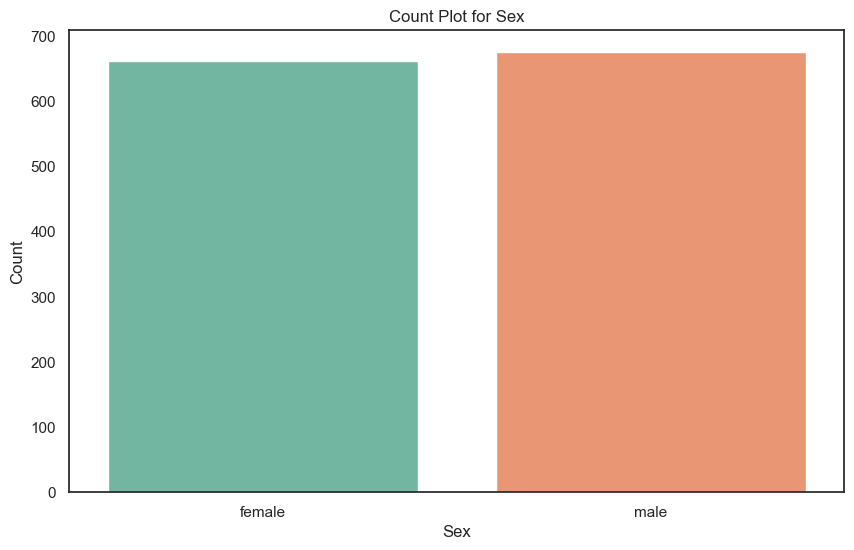

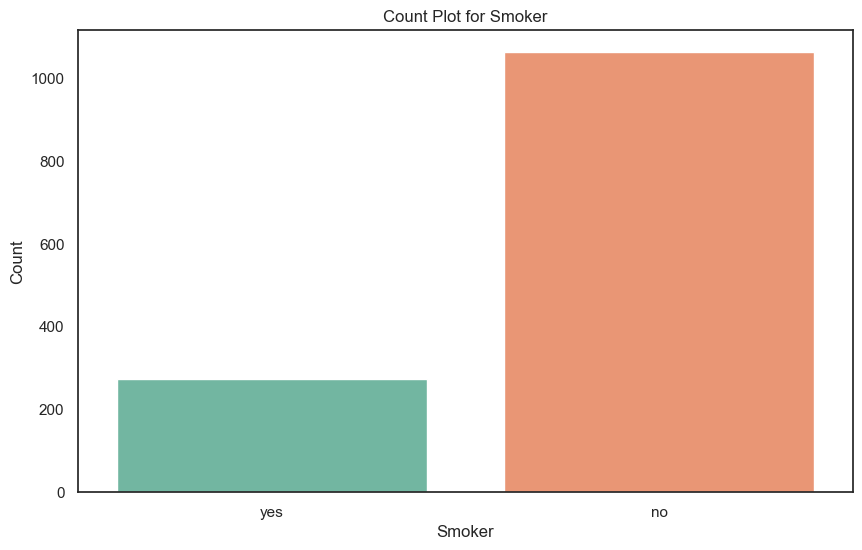

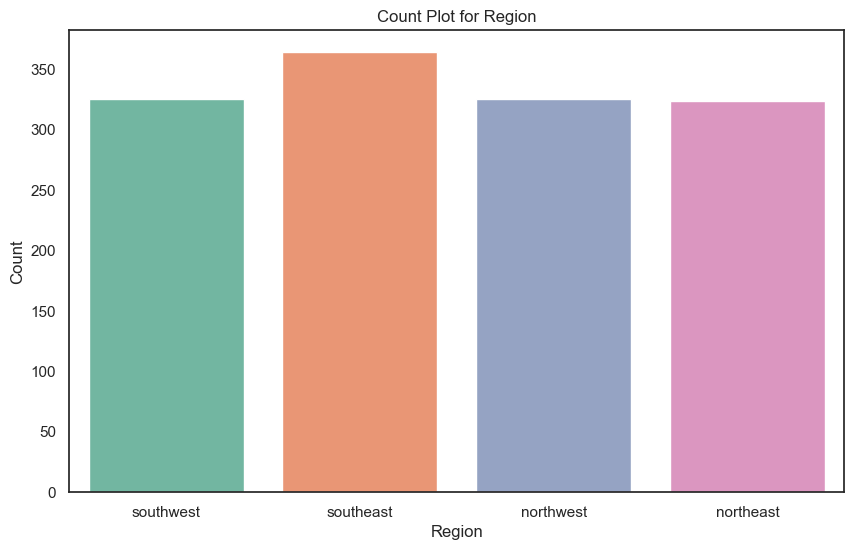

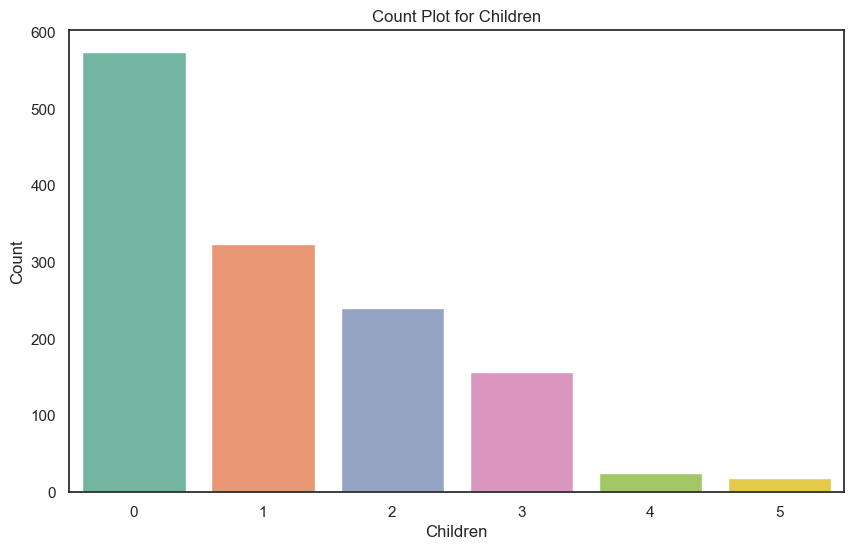

In [13]:
non_numerical_columns = ['sex', 'smoker', 'region','children']


for column in non_numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot for {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.show()

1. Most of Individuals have 0 children in this dataset
2. Count of Regions is almost equal 
3. Quantity of Non Smokers is way higher than Smokers
4. Count of Female and Male is almost equal

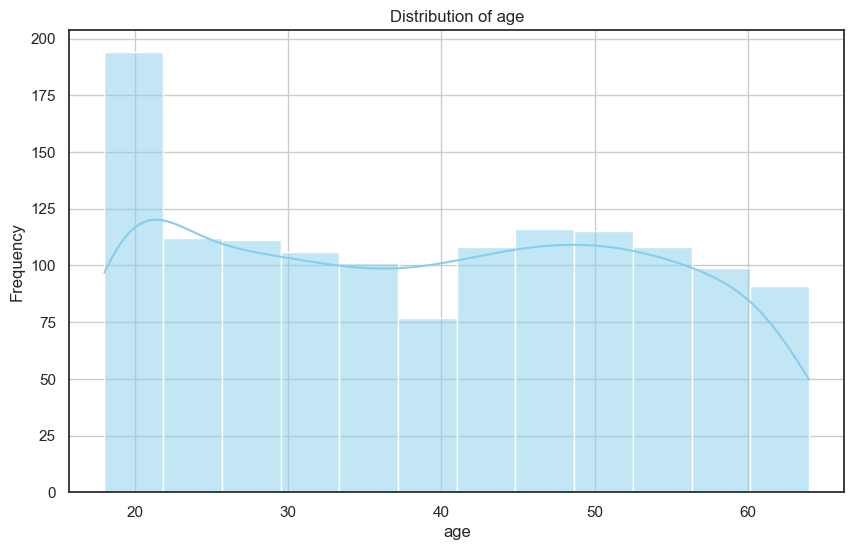

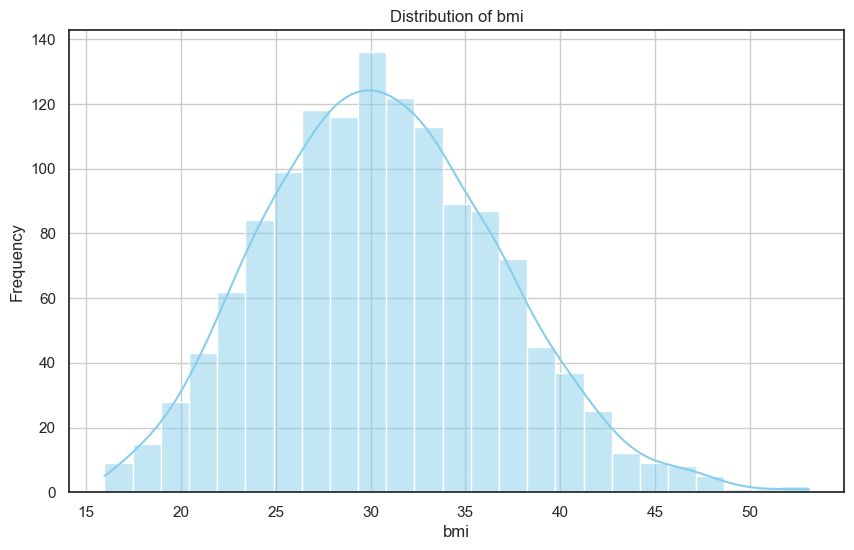

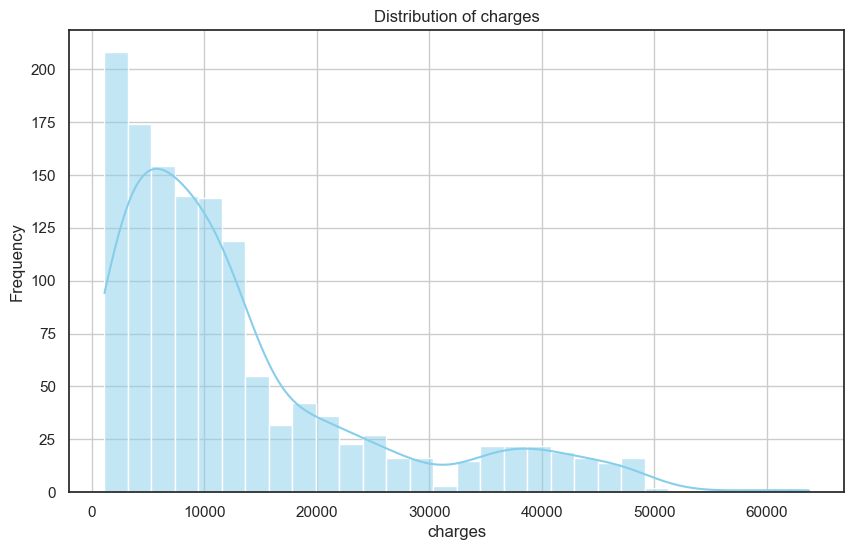

In [14]:
sns.set_style("white")
sns.set_palette('Set2')

df_num=df[['age','bmi','charges']]
for column in df_num.columns:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(df_num[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Data looks Ok, 
Normally Distributed 

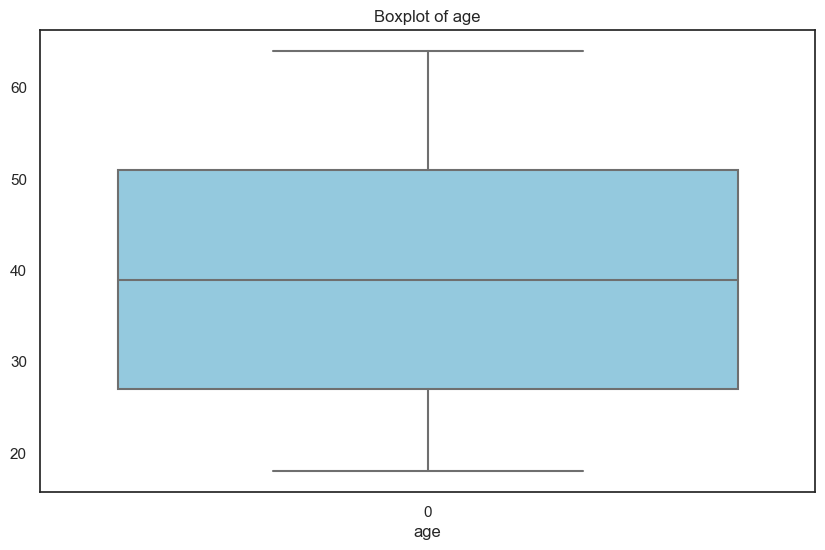

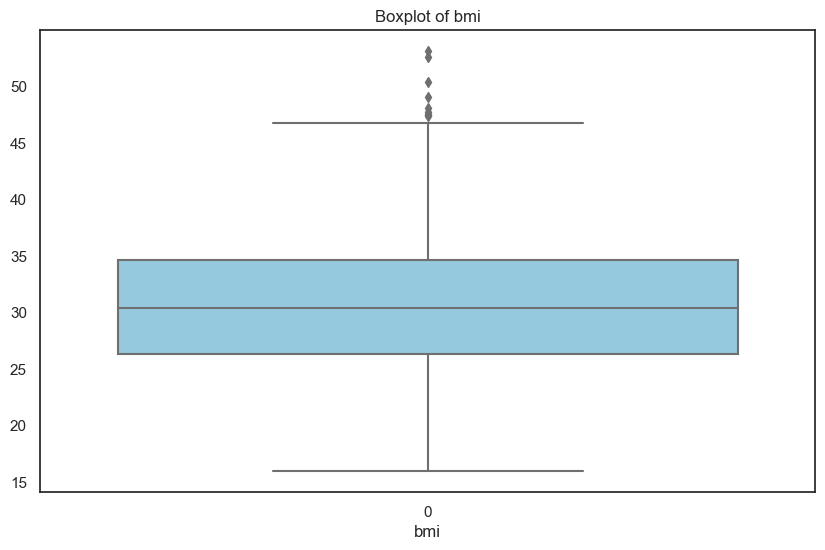

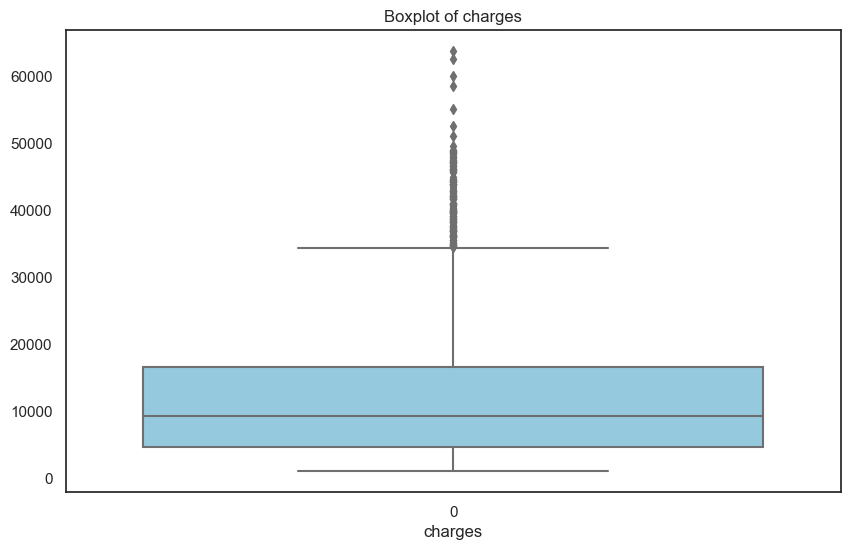

In [17]:
for column in df_num.columns:
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(df_num[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

Few outliers are present

Going with the outliers, not dropping them 

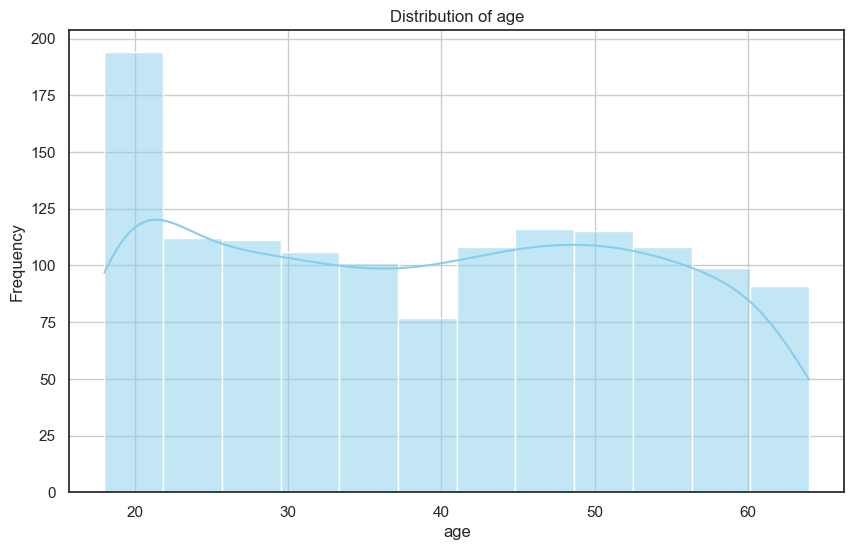

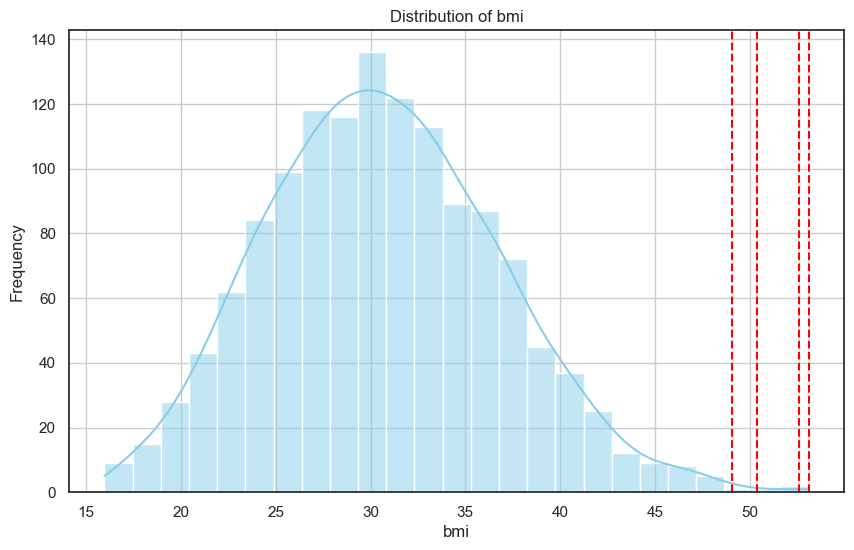

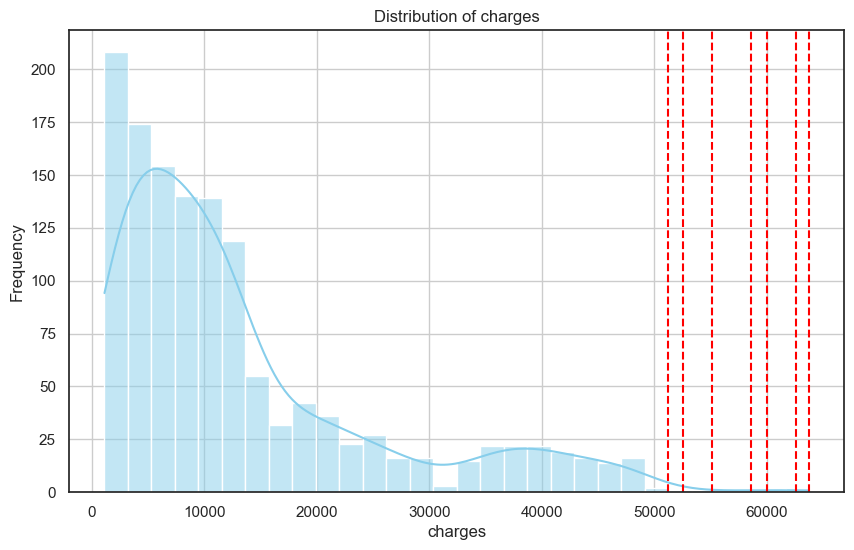

In [18]:
for column in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_num[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    from scipy import stats
    z_scores = stats.zscore(df_num[column])
    outliers = df_num[column][(z_scores > 3) | (z_scores < -3)]
    for outlier in outliers:
        plt.axvline(outlier, color='red', linestyle='--')
    
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

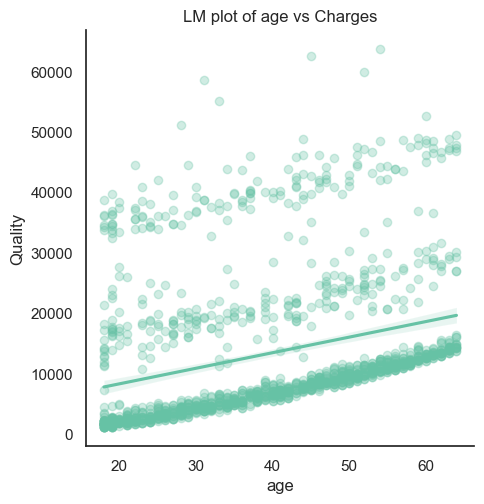

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

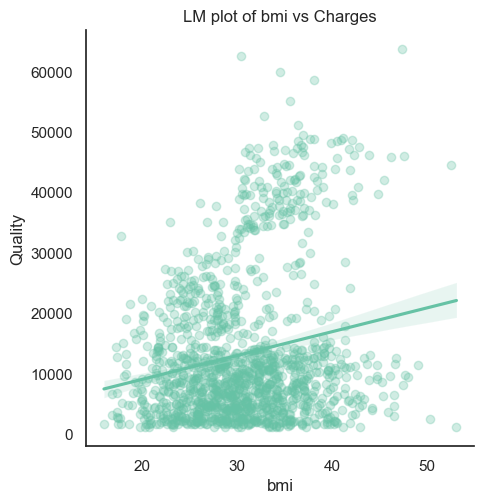

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

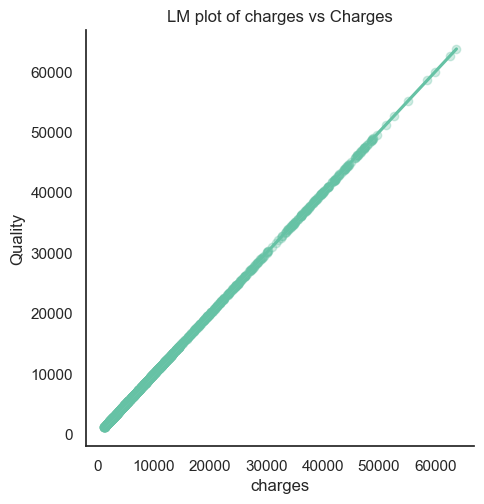

In [21]:
for column in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.lmplot(x=column, y='charges', data=df, palette='Set2', scatter_kws={'alpha':0.3})
    plt.title(f'LM plot of {column} vs Charges')
    plt.xlabel(column)
    plt.ylabel('Quality')
    plt.show()

In [5]:
columns_to_dummify = ['sex', 'smoker']
dummies = pd.get_dummies(df[columns_to_dummify], drop_first=True)

dummies=dummies*1

dummies.head()

,sex_male,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [6]:
ord_encodings_region= {
    'southwest':4,
    'southeast':3,
    'northwest':2,
    'northeast':1
}

df['Region_ord_enc']=df['region'].map(ord_encodings_region)

In [7]:
df_enc=pd.concat([df,dummies],axis=1)

df_enc.head()

,age,sex,bmi,children,smoker,region,charges,Region_ord_enc,sex_male,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,4,0,1
1,18,male,33.770,1,no,southeast,1725.55230,3,1,0
2,28,male,33.000,3,no,southeast,4449.46200,3,1,0
3,33,male,22.705,0,no,northwest,21984.47061,2,1,0
4,32,male,28.880,0,no,northwest,3866.85520,2,1,0


In [8]:
df_enc.drop(columns=['sex','smoker','region'],axis=1,inplace=True)


df_enc.head()

,age,bmi,children,charges,Region_ord_enc,sex_male,smoker_yes
0,19,27.900,0,16884.92400,4,0,1
1,18,33.770,1,1725.55230,3,1,0
2,28,33.000,3,4449.46200,3,1,0
3,33,22.705,0,21984.47061,2,1,0
4,32,28.880,0,3866.85520,2,1,0


In [28]:
df_enc.skew()


age               0.055673
bmi               0.284047
children          0.938380
charges           1.515880
Region_ord_enc   -0.038101
sex_male         -0.020951
smoker_yes        1.464766
dtype: float64

<Axes: >

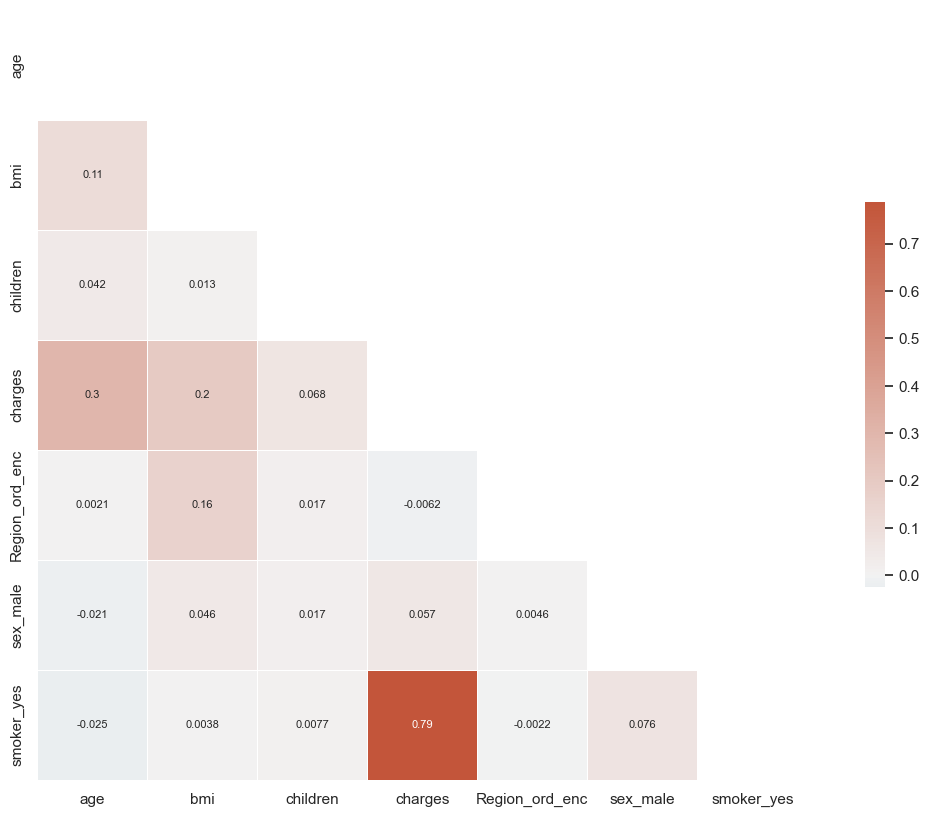

In [29]:
sns.set_theme(style="white")

corr = df_enc.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
 
f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

No high cordanality observed

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


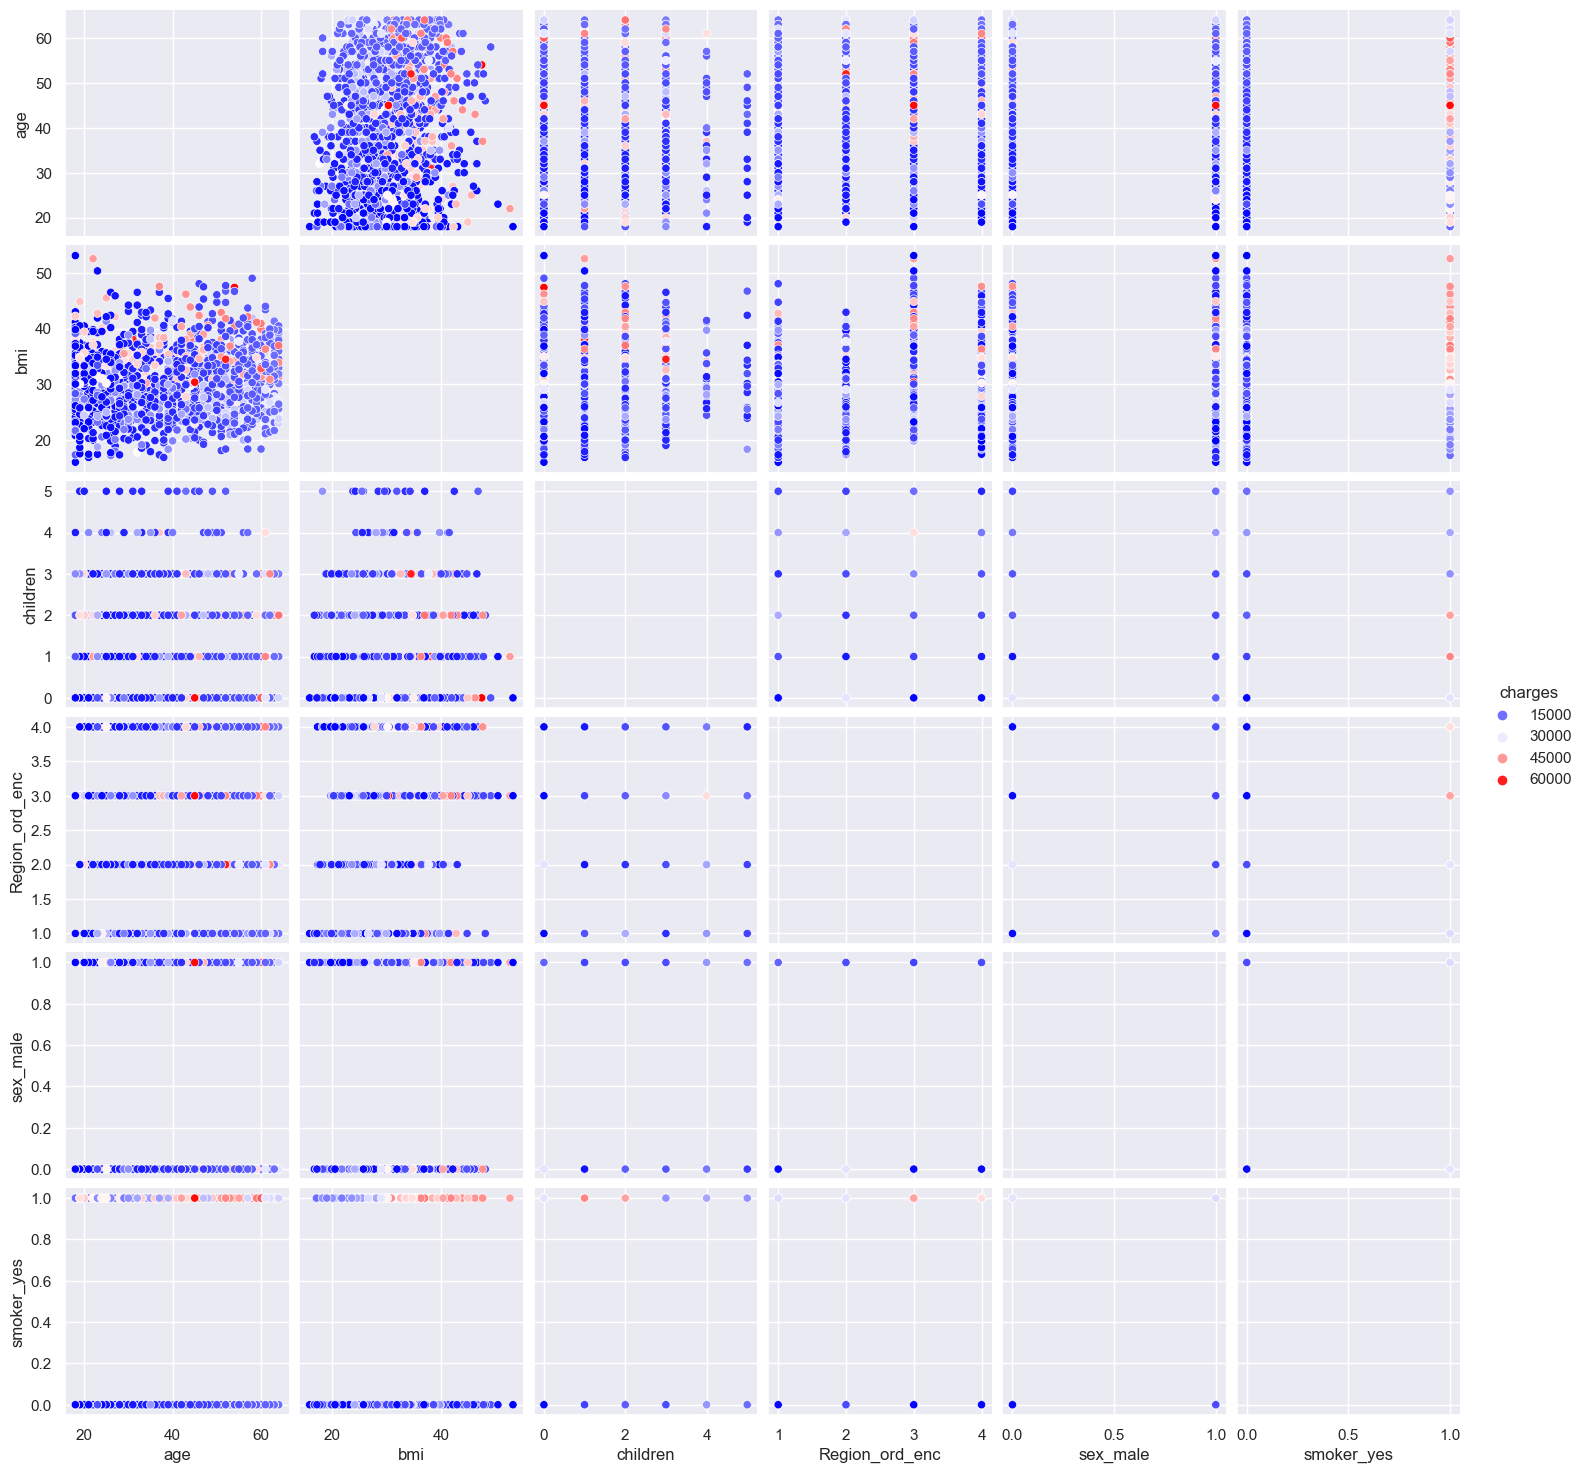

In [9]:
sns.pairplot(df_enc,hue='charges',palette='bwr')

In [32]:
columns_to_scale=['age','bmi']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df_enc[columns_to_scale] = scaler.fit_transform(df_enc[columns_to_scale])

print(df_enc.head())

        age       bmi  children      charges  Region_ord_enc  sex_male  \
0 -1.438764 -0.453320         0  16884.92400               4         0   
1 -1.509965  0.509621         1   1725.55230               3         1   
2 -0.797954  0.383307         3   4449.46200               3         1   
3 -0.441948 -1.305531         0  21984.47061               2         1   
4 -0.513149 -0.292556         0   3866.85520               2         1   

   smoker_yes  
0           1  
1           0  
2           0  
3           0  
4           0  


In [34]:
X = df_enc.drop('charges', axis=1)
y = df_enc['charges']

In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import mean_squared_error, make_scorer

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [85]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=13),
    "Lasso Regression": Lasso(random_state=13),
    "Decision Tree": DecisionTreeRegressor(random_state=13),
    "Random Forest": RandomForestRegressor(random_state=13),
    "Gradient Boosting": GradientBoostingRegressor(random_state=7),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(random_state=13),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


In [86]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R² Score": r2
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R² Score: {metrics['R² Score']:.2f}")
    print()

Model: Linear Regression
  Mean Absolute Error (MAE): 4082.70
  Mean Squared Error (MSE): 34148793.76
  R² Score: 0.78

Model: Ridge Regression
  Mean Absolute Error (MAE): 4092.48
  Mean Squared Error (MSE): 34144531.14
  R² Score: 0.78

Model: Lasso Regression
  Mean Absolute Error (MAE): 4082.57
  Mean Squared Error (MSE): 34146877.11
  R² Score: 0.78

Model: Decision Tree
  Mean Absolute Error (MAE): 2667.04
  Mean Squared Error (MSE): 33441059.60
  R² Score: 0.78

Model: Random Forest
  Mean Absolute Error (MAE): 2439.08
  Mean Squared Error (MSE): 18783409.47
  R² Score: 0.88

Model: Gradient Boosting
  Mean Absolute Error (MAE): 2168.39
  Mean Squared Error (MSE): 15783494.62
  R² Score: 0.90

Model: Support Vector Regressor
  Mean Absolute Error (MAE): 8618.13
  Mean Squared Error (MSE): 168640505.46
  R² Score: -0.10

Model: XGBoost
  Mean Absolute Error (MAE): 3053.73
  Mean Squared Error (MSE): 25260262.92
  R² Score: 0.83

Model: K-Nearest Neighbors
  Mean Absolute Error (M

Gradient Boosting Regressor performs well

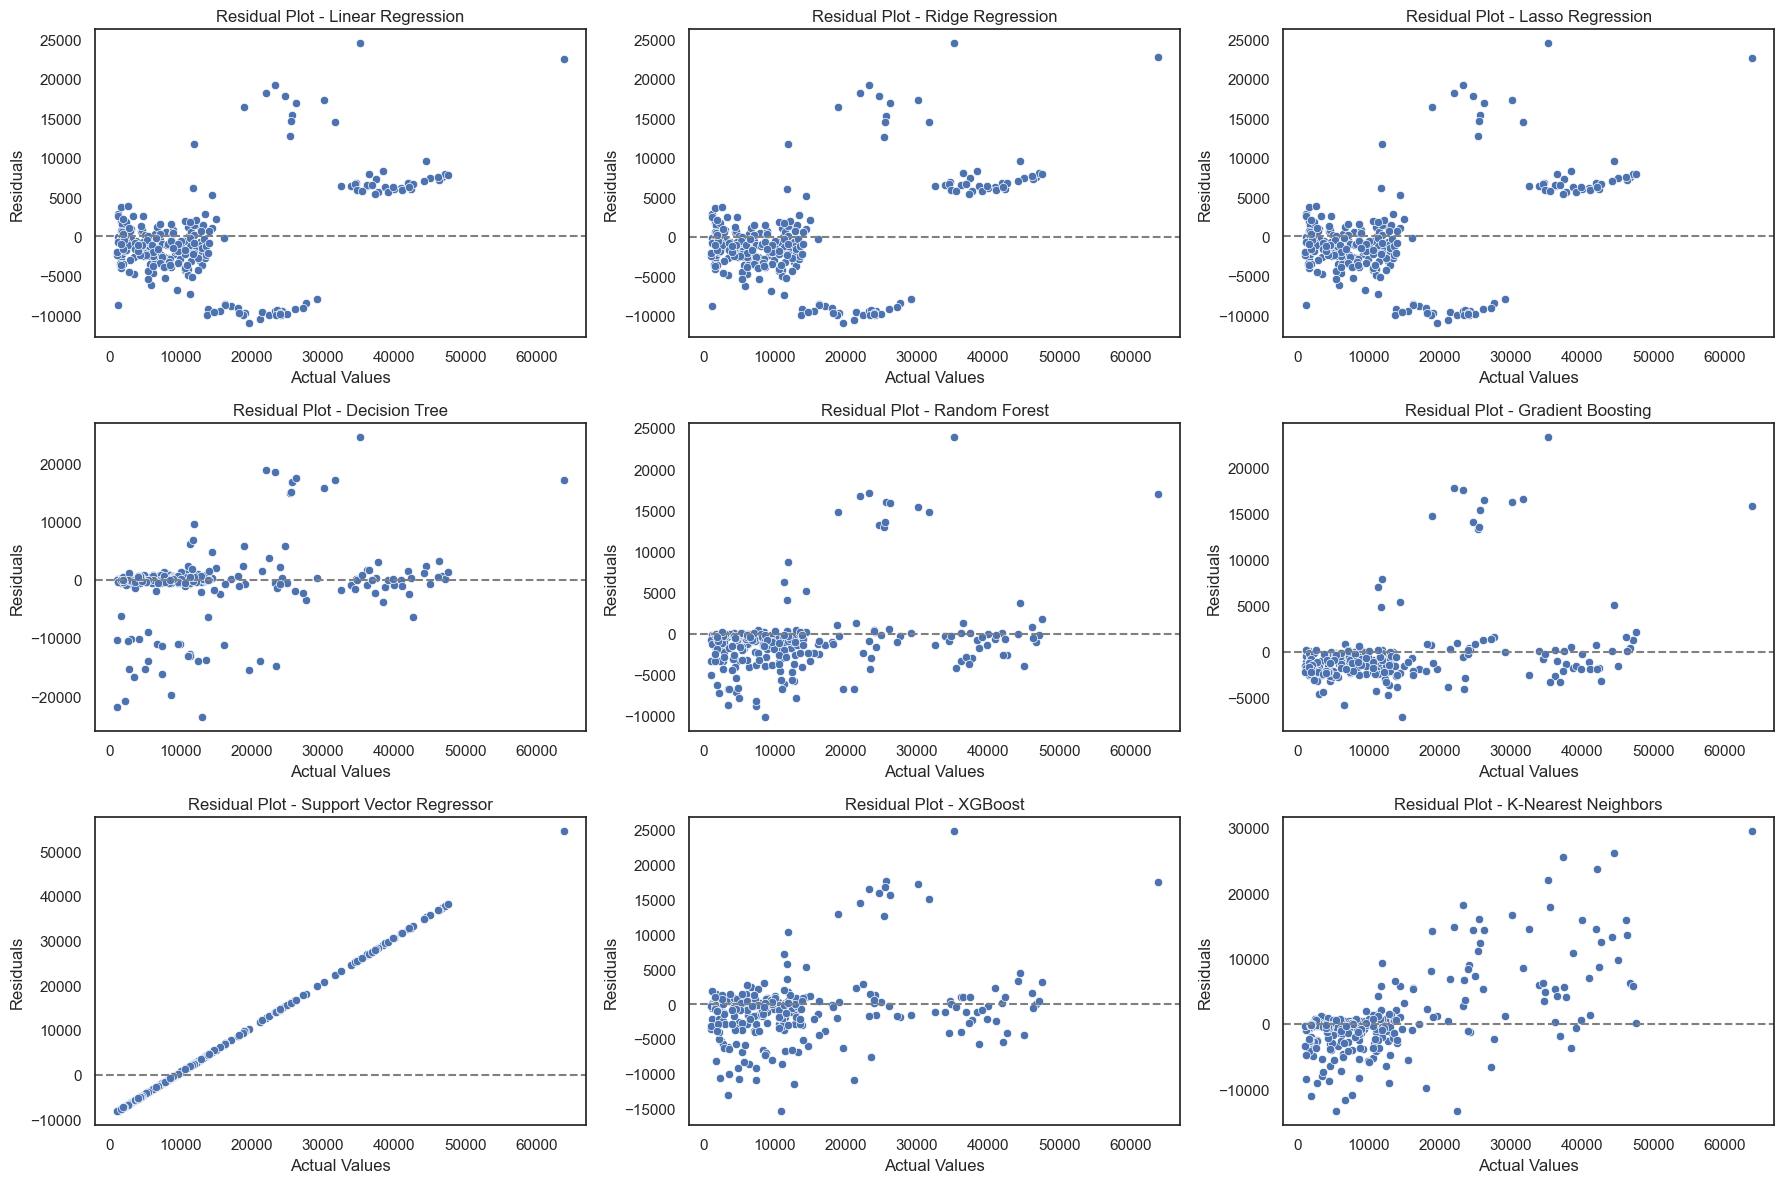

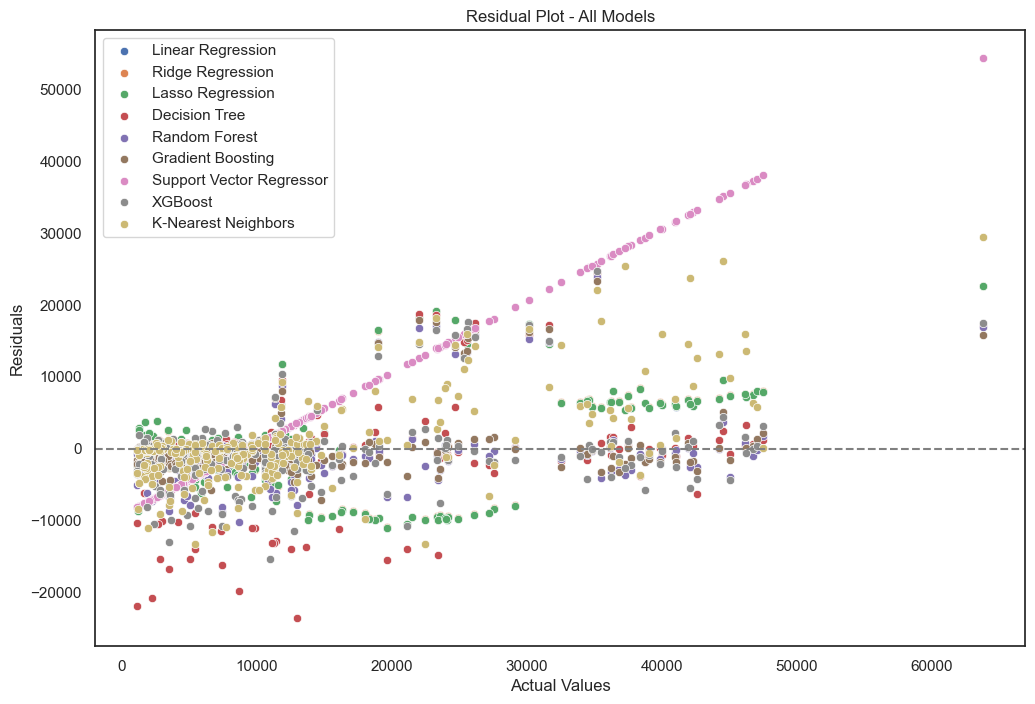

In [46]:
plt.figure(figsize=(18, 12))
for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(3, 3, i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    residuals = y_test - y_pred
    
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    residuals = y_test - y_pred
    
    sns.scatterplot(x=y_test, y=residuals, label=model_name)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - All Models')
plt.legend()
plt.show()

In [47]:
def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        
        
        print("\n======================Train Result=================")
        
        print(f"AccuracScore:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    
    elif train==False:
        pred=clf.predict(X_test)
        
        print("\n======================Test Result=================")
        
        print(f"AccuracScore:{accuracy_score(y_test,pred)*100:.2f}%")
        
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

In [48]:
gbdt_rgr=GradientBoostingRegressor()

gbdt_rgr.fit(X_train,y_train)

GradientBoostingRegressor()

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


split_random_states = range(1, 57)
model_random_states = range(1, 57)

best_split_random_state = None
best_model_random_state = None
best_r2_score = -float('inf')

for split_state in split_random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=split_state)
    
    for model_state in model_random_states:
        model = GradientBoostingRegressor(random_state=model_state)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        
        if r2 > best_r2_score:
            best_r2_score = r2
            best_split_random_state = split_state
            best_model_random_state = model_state

print(f"The best random state for train-test split is {best_split_random_state}")
print(f"The best random state for Gradient Boosting Regressor is {best_model_random_state}")
print(f"The best R² score achieved is {best_r2_score:.4f}")


The best random state for train-test split is 13
The best random state for Gradient Boosting Regressor is 8
The best R² score achieved is 0.8934


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [80]:
gbdt_rgr = GradientBoostingRegressor(random_state=8)
gbdt_rgr.fit(X_train, y_train)

y_pred = gbdt_rgr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("GradientBoostingRegressor Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  R² Score: {r2:.2f}")

GradientBoostingRegressor Evaluation:
  Mean Absolute Error (MAE): 2174.43
  Mean Squared Error (MSE): 15884167.06
  R² Score: 0.90


In [73]:
grid_param = {
    'n_estimators': range(20,150,10),
    'max_depth' : range(4,20),
    'min_samples_split' : range(2,8,2),
    'learning_rate' : np.arange(0.1,2.0)
}

In [94]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=gbdt_rgr, param_grid=grid_param, scoring=mse_scorer, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)
print()

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R² Score: {r2:.2f}")

Fitting 5 folds for each of 1248 candidates, totalling 6240 fits
Best Parameters:
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 40}

Mean Squared Error (MSE) on Test Set: 15640345.03
  Mean Absolute Error (MAE): 2199.94
  R² Score: 0.90


In [93]:
from sklearn.model_selection import cross_validate, KFold
model = GradientBoostingRegressor(random_state=8,learning_rate= 0.1, max_depth= 4, min_samples_split=6, n_estimators=40)

kf = KFold(n_splits=5, shuffle=True, random_state=8)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

cv_results = cross_validate(estimator=model,
                            X=X, y=y,
                            scoring=scoring,
                            cv=kf,
                            n_jobs=-1)

print("Cross-Validation Results:")
for fold_idx in range(1, kf.get_n_splits() + 1):
    print(f"Fold {fold_idx}:")
    print(f"  R² Score: {cv_results['test_r2'][fold_idx-1]:.2f}")
    print(f"  Mean Absolute Error (MAE): {cv_results['test_mae'][fold_idx-1]:.2f}")
    print(f"  Mean Squared Error (MSE): {cv_results['test_mse'][fold_idx-1]:.2f}")
    print()

average_r2 = cv_results['test_r2'].mean()
average_mae = cv_results['test_mae'].mean()
average_mse = cv_results['test_mse'].mean()

print("Average Metrics across all folds:")
print(f"  Average R² Score: {average_r2:.2f}")
print(f"  Average Mean Absolute Error (MAE): {average_mae:.2f}")
print(f"  Average Mean Squared Error (MSE): {average_mse:.2f}")

Cross-Validation Results:
Fold 1:
  R² Score: 0.86
  Mean Absolute Error (MAE): 2512.37
  Mean Squared Error (MSE): 19338220.63

Fold 2:
  R² Score: 0.87
  Mean Absolute Error (MAE): 2592.28
  Mean Squared Error (MSE): 19335972.79

Fold 3:
  R² Score: 0.83
  Mean Absolute Error (MAE): 2590.28
  Mean Squared Error (MSE): 24639844.95

Fold 4:
  R² Score: 0.87
  Mean Absolute Error (MAE): 2541.23
  Mean Squared Error (MSE): 21489290.12

Fold 5:
  R² Score: 0.86
  Mean Absolute Error (MAE): 2473.04
  Mean Squared Error (MSE): 18758451.64

Average Metrics across all folds:
  Average R² Score: 0.86
  Average Mean Absolute Error (MAE): 2541.84
  Average Mean Squared Error (MSE): 20712356.03


Model performance didn't increase 

#### New Approach: Formulating New Features 

In [96]:

df['smoker_binary'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

df['age_bmi'] = df['age'] * df['bmi']
df['age_smoker'] = df['age'] * df['smoker_binary']
df['bmi_smoker'] = df['bmi'] * df['smoker_binary']


df['bmi_squared'] = df['bmi'] ** 2
df['age_squared'] = df['age'] ** 2


df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)


df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 75, 85])
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=["underweight", "normal", "overweight", "obese"])


df['has_children'] = (df['children'] > 0).astype(int)
df['charge_per_child'] = df['charges'] / (df['children'] + 1)


df = pd.get_dummies(df, columns=['age_group', 'bmi_category'], drop_first=True)

print(df.head())


   age     bmi  children smoker      charges  smoker_binary  age_bmi  \
0   19  27.900         0    yes  16884.92400              1  530.100   
1   18  33.770         1     no   1725.55230              0  607.860   
2   28  33.000         3     no   4449.46200              0  924.000   
3   33  22.705         0     no  21984.47061              0  749.265   
4   32  28.880         0     no   3866.85520              0  924.160   

   age_smoker  bmi_smoker  bmi_squared  ...  charge_per_child  \
0          19        27.9   778.410000  ...       16884.92400   
1           0         0.0  1140.412900  ...         862.77615   
2           0         0.0  1089.000000  ...        1112.36550   
3           0         0.0   515.517025  ...       21984.47061   
4           0         0.0   834.054400  ...        3866.85520   

   age_group_(25, 35]  age_group_(35, 45]  age_group_(45, 55]  \
0               False               False               False   
1               False               False     

In [100]:
from sklearn.model_selection import train_test_split


X = df.drop(['charges', 'smoker'], axis=1)  
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print(X_train.shape, X_test.shape)


(1070, 24) (268, 24)


In [103]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model = GradientBoostingRegressor(random_state=8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 512.3347346802487
Mean Squared Error (MSE): 881330.1267146403
R² Score: 0.9937994748319


In [102]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"R² Score: {r2_best}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
Mean Absolute Error (MAE): 379.81200280402277
Mean Squared Error (MSE): 608096.3004577231
R² Score: 0.995721788803848
